<a href="https://colab.research.google.com/github/EDANHS/ADA-informes/blob/main/Informe10_Bellman_Ford.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Algoritmo Bellman-Ford

##Problema del camino más corto con única fuente o Single-Source Shortest Paths

---

El problema del camino más corto consiste en encontrar la ruta o **distancia** más corta de un vértice inicial o fuente para todos los nodos en un grafo $G = (V,E)$, con una función $w : E \rightarrow R$, la cual asigna valores reales a los arcos en $G$. Dicho peso $w(p)$ del camino $p = (V_0,V_1,...,V_k)$ es la suma de los pesos de sus aristas, está función se puede definir como:

$w(p) = \displaystyle\sum_{i = 1}^{k} w(v_{i-1},v_i)$

**Distancia**: suma de los arcos en un grafo.

---

##1.Descripción del problema

---

El algoritmo de Bellman-Ford es una solución al problema del camino más corto con fuente única para un vértice o nodo $s$, con un grafo $G = (V,E)$ que puede poseer arcos con peso **negativo**. Dicho algoritmo funciona mediante **programación dínamica** y es capaz de encontrar el camino más corto o determinar si el grafo $G$ posee un ciclo negativo.

$Entrada:$ Un grafo dirigido $G=(V,E)$, un vértice fuente $s\in V$, y un valor real $l_e$ asociado a cada arco $e\in E$.

$Salida:$ Una de las siguientes opciones:

1. La distancia más corta $dist(s,v)$ para cada vértice $v\in V$.
2. Una declaración indicando que $G$ contiene un ciclo negativo.

---

##2. Descripción del algoritmo

---


Para poder comprender como funciona el algoritmo de Bellman-Ford debemos saber que es un ciclo negativo y conocer la subestructura optima definida para el algoritmo.

### **Ciclos negativos**

Sabiendo que hay grafos que pueden tener arcos de peso negativo, para hablar de un camino más ' corto ', debemos tener especial cuidado con los ciclos, puesto que si hay uno, la suma de los arcos puede llegar al -$∞$, como consecuencia de seguir iterando continuamente, dado que según su lógica, un algoritmo estaria encontrando la distancia menor, lo que conviene, ya que es el problema a resolver. En conclusión, se debe tener precaución con los **ciclos negativos**.


### **Subestructura óptima**

Como es sabido, los problemas de programación dinámica consiste en encontrar una forma de resolver subproblemas a través de subproblemas más pequeño.

Para el problema, se hace el siguiente ánalisis: 

Digamos que, $i$ se define como la **cantidad de arcos** para ir de $s$ a $v$, siendo esta la ruta óptima $P$, en un grafo $G = (V,E)$, se puede calcular la rutas óptima $P'$ entre $s$ y un vértice o nodo $w$, que se limita a $i-1$ arcos, finalmente, se escoge la mejor alternativa de $w$ a $v$ y obtendriamos la mejor ruta.

**Dato a tener en cuenta:** La ruta más corta $P$ tiene $n-1$ arcos, por lo cual, $i = n-1$.

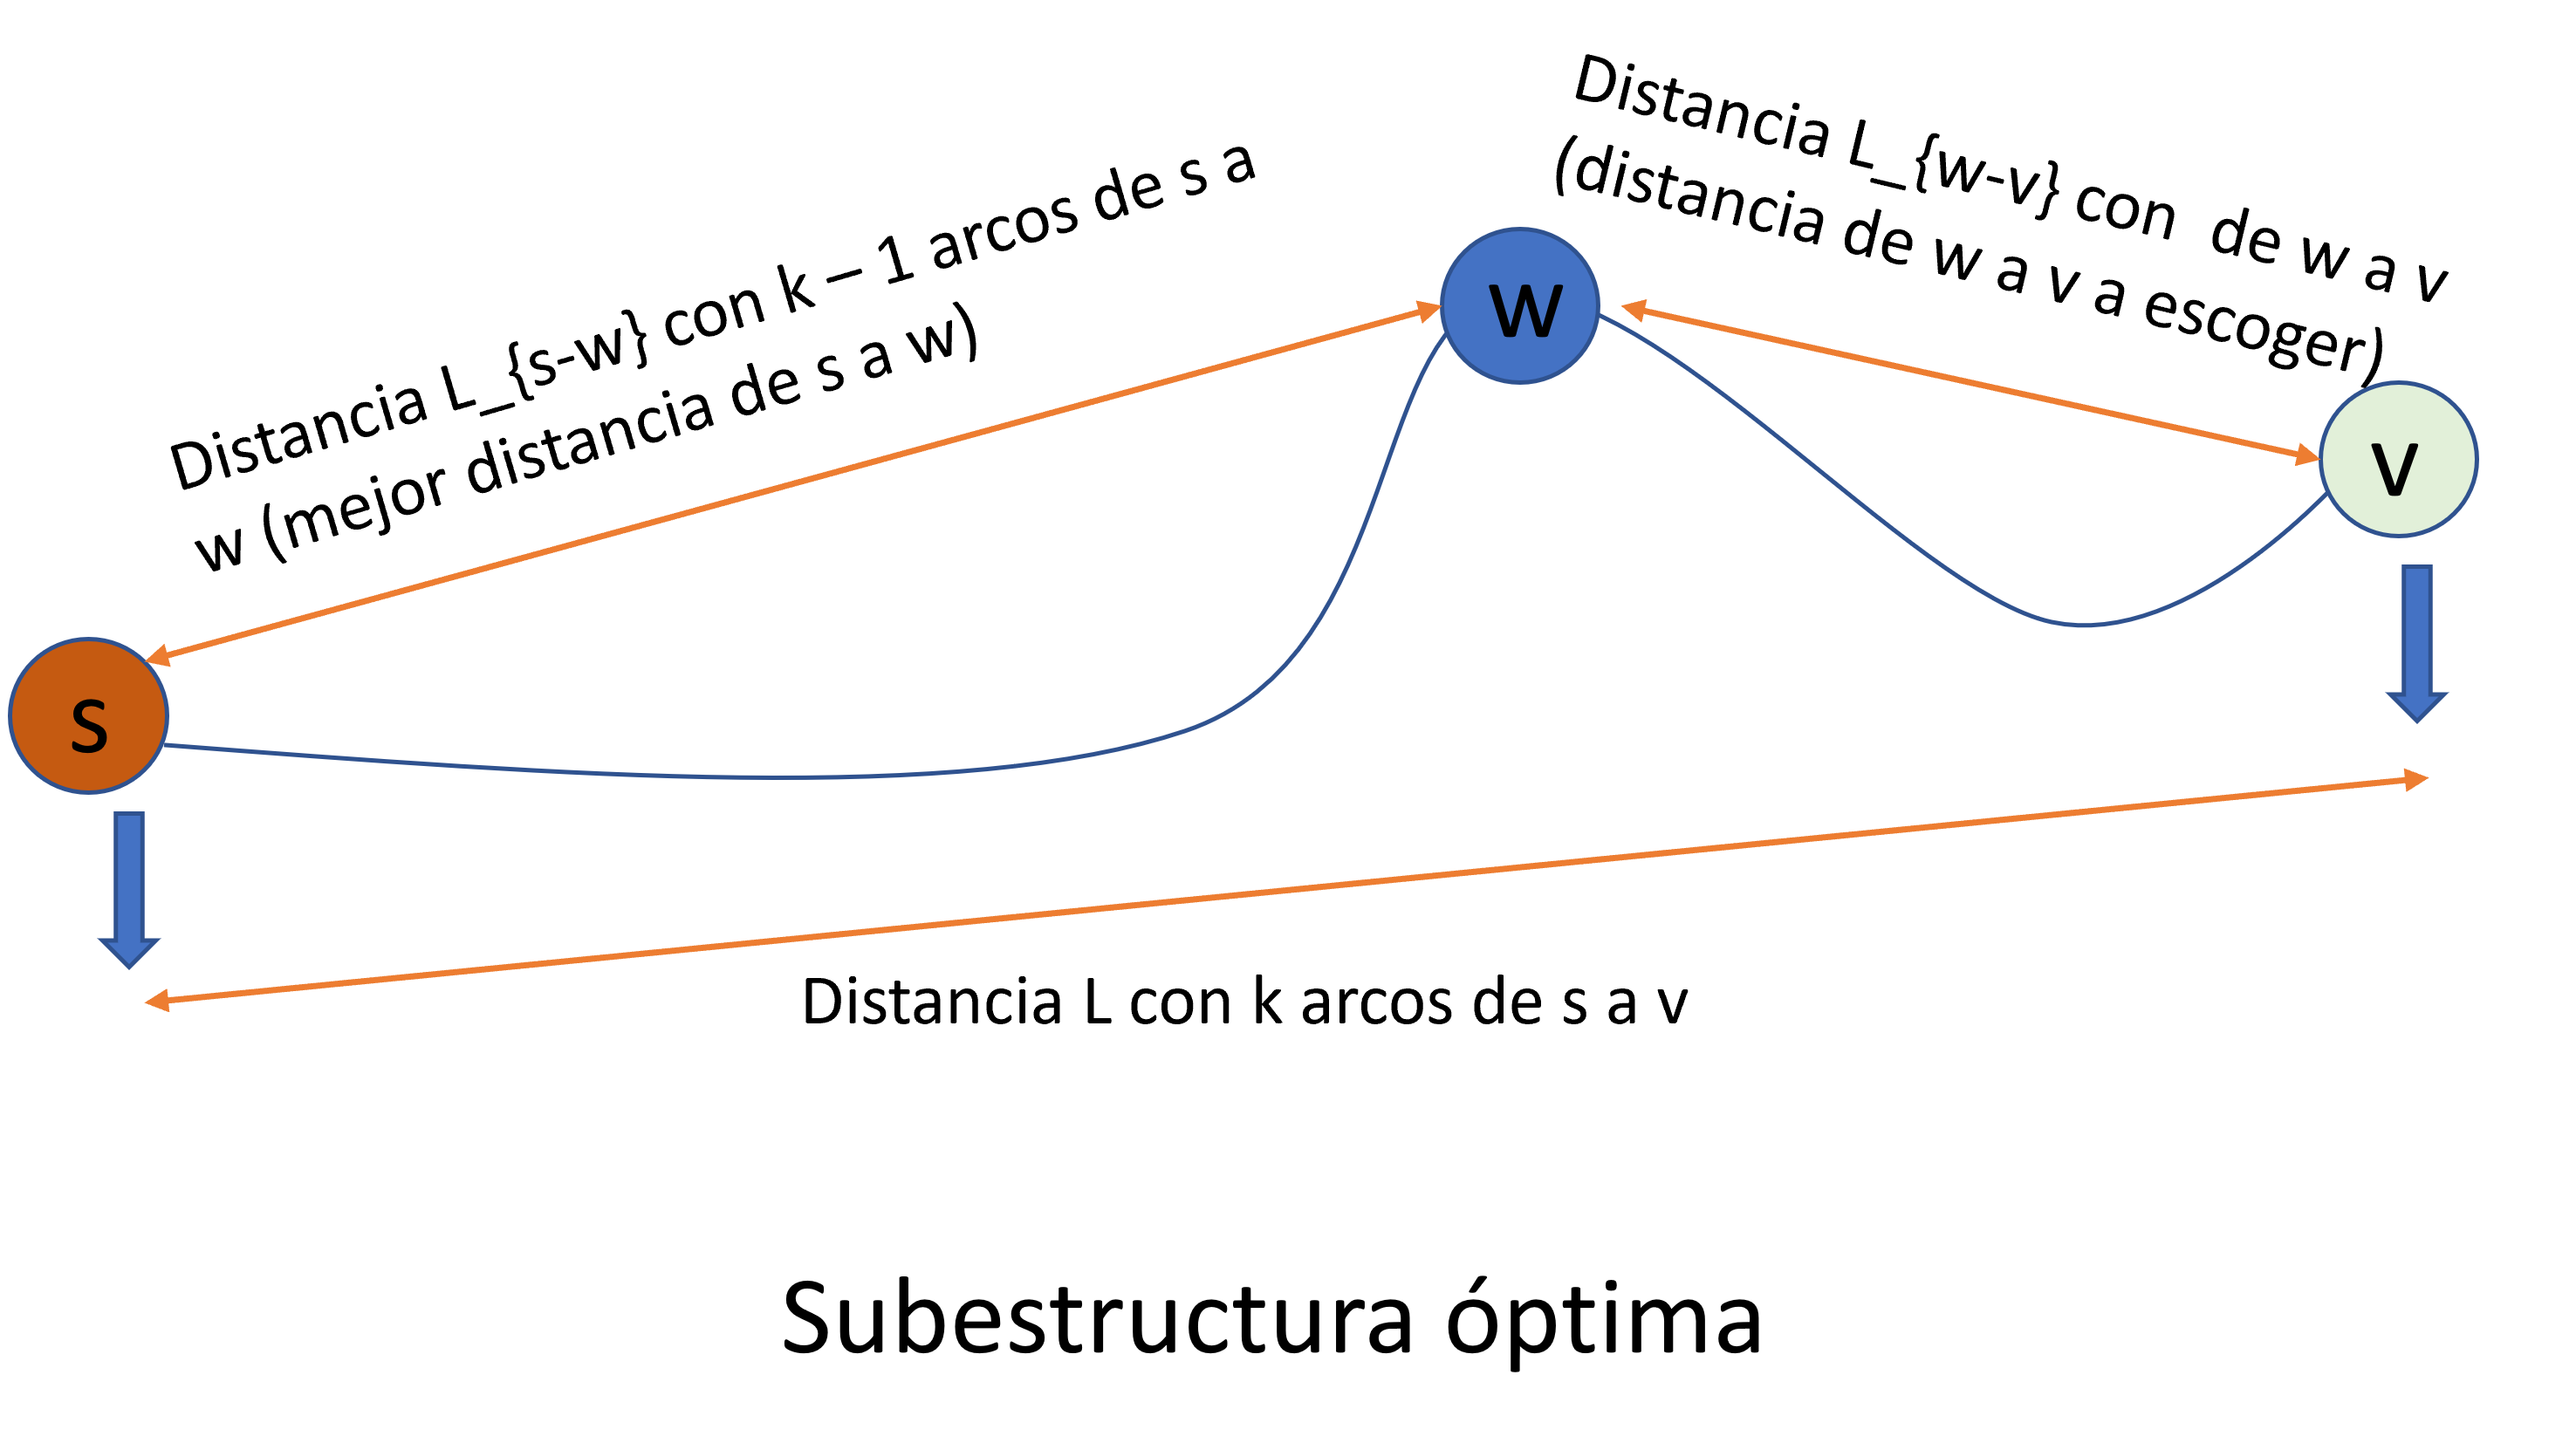

Si no conocemos la **cantidad de arcos**, se puede redefinir el problema a encontrar $i$ arcos o menos. Por lo anterior, pueden suceder estas situaciones:

1. La ruta más corta posee $i-1$ arcos o menos, entonces, la ruta más corta para $P'$ se calcula en $i-1$ arcos o menos.

2. La ruta más corta es $i$ arcos, por ende, se puede subdividir el subproblema en encontrar la ruta más corta de $s$ a un nodo $w$ y sumar la ruta óptima de $w$ a $v$ como se explicó en un principio.



En base a nuestro ánalisis anterior se puede plantear la siguiente subestructura óptima para resolver el problema.

####$Lema$

Sea $G = (V,E)$ un grafo dirigido con largo de arcos reales y una fuente $s \in V$. Suponiendo que $i \geq 1$ (la cantidad de arcos sea mayor o igual a 1, o mejor dicho que existan conexiones en el grafo) y $v \in V$, y sea $P$ la ruta más corta de $s \leadsto v$ en $G$ con $i$ arcos o menos. Entonces se puede afirmar una de las dos situaciones siguientes:

* $P$ es la ruta más corta de $i-1$ arcos o menos.

* $P$ es, para algún valor $w \in V$, la ruta más corta $s \leadsto w$ con $i -1$ arcos o menos, más el arco $(w,v) \in E$. 

Finalmente, gracias a nuestro lema anterior de la subestructura óptima podemos establecer la siguiente función de recurrencia para el algoritmo de Bellman-Ford.

Se debe considerar $L$<sub/>$i,v$</sub> como el largo minimo para ir de $s$ a $v$ con $i-1$ arcos y ciclos máximos permitidos. Para todo $i \geq 1$ y $v \in V$ se da:

* $L$<sub/>$i,v$</sub> = $\min \left\{
 \begin{array}{cc}
 L_{i-1,v} & \text{(case 1)} \\
 \min\limits_{(w,v)\in E} \{L_{i-1,w}+l_{wv}\} & \text{(case 2)}
    	\end{array}
\right\}$

Los casos bases serian los siguientes:

* $L$<sub/>$i,v$</sub> = $\{\begin{array}{cc} 
  0 & \text{si $$s=v$$} \\
  +\infty & \text{en otro caso}
  \end{array} \}$
  



#3. Código

A continuación, se presentan las librerias a ocupar para la implementación de los algoritmos, Verbose y Visualize.

In [4]:
from networkx.drawing.nx_pydot import graphviz_layout
from collections import defaultdict
import math
import random
import matplotlib.pyplot as plt
import networkx as nx
from termcolor import colored

## Generador de instancias

1. Código entregado en la guía para generar instancias.

In [5]:
def is_valid_edge(generated_edges: dict, i: int, j: int):
    return i != j and not generated_edges.get((i, j), None) and not generated_edges.get((j, i), None)

def instance_generator(n: int, InNegative = False):
    """
        Input: cantidad de vértices
        Output: una lista que contiene todos los arcos y el número del vértice fuente (la función retorna dos variables).
        Los arcos vienen en la forma (i, j, weight), donde i es el vértice origen del arco y j el vértice al que apunta el arco, mientras que weight es su peso.
    """
    graph = []
    nodes = random.sample(range(0, n), n)
    unvisited_nodes = random.sample(range(0, n), n)

    #Modificación aplicada para manejar arcos negativos
    if InNegative == False:
      limInf = -25
    else: limInf = 0
    
    generated_edges = {}
    for i in nodes:
        rand = random.sample(nodes, random.randint(1, 3))

        for j in rand:
            edge = (i, j)
            edge_with_weight = (i, j, random.randint(1, 100))
            
            if generated_edges.get((edge[1], edge[0]), None):
                continue
            
            if i == j:
                new_vertice = None
                iterations = 0
                while new_vertice is None and iterations < 250:
                    iterations += 1
                    number = random.randint(0, n - 1)
                    if is_valid_edge(generated_edges, i, number):
                        new_vertice = number

                if iterations >= 250:
                    return instance_generator(n)
                
                edge = (i, new_vertice)
                edge_with_weight = (i, new_vertice, random.randint(limInf, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
            
            graph.append(edge_with_weight)
            generated_edges[edge] = edge

            if edge_with_weight[1] in unvisited_nodes:
                unvisited_nodes.remove(edge_with_weight[1])

    for i in unvisited_nodes:
        valid_edge = False
        iterations = 0
        while not valid_edge and iterations < 250:
            iterations += 1
            m = random.randint(0, n - 1)
            if is_valid_edge(generated_edges, m, i):
                valid_edge = True
                edge = (m, i)
                edge_with_weight = (m, i, random.randint(limInf, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
                graph.append(edge_with_weight)
                generated_edges[edge] = edge

        if iterations >= 250:
            return instance_generator(n)

    return graph, graph[0][0]

In [6]:
def graph_to_nxdigraph(graph: list, n: int):
    """
        Input: Un grafo en formato list[tuple]. Ej: [(0, 1, 10), (1, 2, 15), (2, 0, 7)].
        Output: Un nx.DiGraph de la libreria networkx.
    """
    nxdigraph = nx.DiGraph()
    [nxdigraph.add_node(i) for i in range(n)]

    for v in graph:
        nxdigraph.add_edge(v[0], v[1], weight=v[2])

    return nxdigraph

## Código de visualización

1. Visualizador de grafos a través de la libreria networkx

In [7]:
def visualize(G):
  pos=nx.spring_layout(G)
  labels = nx.get_edge_attributes(G,'weight')
  nx.draw_networkx_edge_labels(G,pos,edge_labels=labels,font_size=14)
  node_size = 500
  nx.draw(G, pos, with_labels=True, node_size=node_size, font_color="black", font_size=8, width  =1.0)
  nodes = nx.draw_networkx_nodes(G, pos,  node_size=node_size, node_color="white")
  nodes.set_edgecolor('black')

## Algoritmo de Bellman-Ford

1. Primero se mostrará la implementación del algoritmo de Bellman-Ford para un grafo $G = (V,E)$ creado mediante el generador de instancias.

2. Este algoritmo está implementado para considerar ciclos negativos.

In [56]:
##Obtener ruta recursivamente agregandola a una lista
def getRuta(ruta : list, node : int):
    if node < 0:
        return []
    return getRuta(ruta, ruta[node]) + [node]

def obtener_ruta(n_fuente : int, ruta : list, distancia : list):
  print("===================================================")
  print(f'Para el nodo fuente {n_fuente}, la distancia más corta')
  print(f'con cada nodo y la ruta que debe seguir son las siguientes:\n\n')
  ##Calcular ruta entre cada uno Vertice y la fuente
  tupla = list()
  for node in range(n):
    if node != n_fuente and distancia[node] < float('inf'):
      lista = getRuta(ruta,node)
      tupla.append((node,lista))
      print(f'La distancia entre el nodo {node} y el {n_fuente} es {distancia[node]}')
      print(f'y su ruta es: {lista}')

  print("===================================================")
  return tupla

def BellmanFord(conexiones : list, n_fuente : int, n : int,Verbose = False):
  ##Arreglos auxiliares para guardar el camino más corto y su ruta
  distancia = [float('inf')] * n
  distancia[n_fuente] = 0
  ruta = [-1] * n
  if Verbose == True:
    print("===================================================")
    print(colored("Obteniendo ruta minima...\n"))
    print("Arreglo de entrante: ",colored(distancia,'blue'))
  #Obtener distancia minima
  for node in range(n - 1):
    for (u,v,w) in conexiones:
      ##Proceso de relajación de nodos
      if distancia[u] != float('inf') and distancia[u] + w < distancia[v]:
        distancia[v] = distancia[u] + w
        ruta[v] = u
        if Verbose == True:
          print(f'Distancia entre el nodo {u} y {v} es: {distancia[u]+w}')
          print("Arreglo de distancias: ",colored(distancia,'blue'),end='\n')
  if Verbose == True:
    print(colored('Mejor arreglo de distancias encontrado:','cyan'),end=' ')
    print(distancia)
    print("===================================================\n")
  ##Verificar si hay ciclos negativos
  for (u,v,w) in conexiones:
    if distancia[u] != float('inf') and distancia[u] + w < distancia[v]:
      if Verbose == True: print(colored("El grafo presenta un ciclo negativo",'red'))
      return [],[]

  return distancia, ruta


def BF(n : int, InNegative : bool, Verbose : bool, Visualize : bool):
  conexiones, n_fuente = instance_generator(n,InNegative)
  distancia, ruta = BellmanFord(conexiones,n_fuente,n,Verbose)

  if Verbose == True and len(distancia) > 0:
    tupla = obtener_ruta(n_fuente,ruta,distancia)

  if Visualize == True:
    G = graph_to_nxdigraph(conexiones,n)
    visualize(G)


## Algoritmo de Dijkstra

1. A continuación se muestra la implementación del algoritmo de Dijkstra.

2. Se deben considerar solo arcos positivos.


In [10]:
from heapq import heappop,heappush

In [42]:
def Dijkstra(conexiones,n_fuente,n,Verbose = False):
  distancia = [float('inf')] * n
  distancia[n_fuente] = 0
  Q = list()

  heappush(Q,(0,n_fuente))
  rastreo = [False] * n
  rastreo[n_fuente] = True
  ruta = [-1] * n

  while Q:

    node = heappop(Q)
    x = node[1]

    for (u,v,w) in conexiones:
      ##relajacion
      if not rastreo[v] and distancia[x] + w < distancia[v]:
        distancia[v] = distancia[x] + w
        ruta[v] = x
        heappush(Q,(distancia[v],v))
    ##Marcar vertice para no repetir nodo
    rastreo[x] = True


  print(distancia)
  print(ruta)
  return distancia,ruta

def get_ruta(ruta,node,lista):
    if node >= 0:
        get_ruta(ruta, ruta[node], lista)
        lista.append(node)

def obtener_ruta_dijkstra(n_fuente : int, ruta : list, distancia : list):
  print("===================================================")
  print(f'Para el nodo fuente {n_fuente}, la distancia más corta')
  print(f'con cada nodo y la ruta que debe seguir son las siguientes:\n\n')
  ##Calcular ruta entre cada uno Vertice y la fuente
  tupla = list()
  lista = list()
  for node in range(n):
    if node != n_fuente and distancia[node] < float('inf'):
      lista = get_ruta(ruta,node,lista)
      tupla.append((node,lista))
      print(f'La distancia entre el nodo {node} y el {n_fuente} es {distancia[node]}')
      print(f'y su ruta es: {lista}')

  print("===================================================")
  return tupla

def DST(n : int, Verbose : bool, Visualize : bool):
  conexiones, n_fuente = instance_generator(n,True)
  distancia, ruta = Dijkstra(conexiones,n_fuente,n,Verbose)
  
  if Verbose == True:
    tupla = obtener_ruta_dijkstra(n_fuente,ruta,distancia)

  if Visualize == True:
    G = graph_to_nxdigraph(conexiones,n)
    visualize(G)

[0, 50, 22, 35, 90]
[-1, 0, 0, 0, 0]


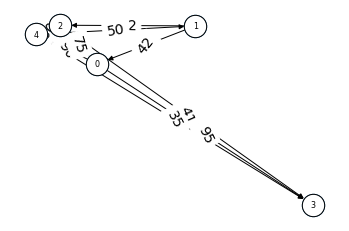

In [60]:
DST(5,False,True)

#Ejemplo de algoritmo de BellmanFord con variables Verbose == True y Vizualize == True

Para el siguiente problema se mostrará un ejemplo de ambas opciones con valor $True$ para un grafo de 6 nodos.

In [ ]:
BF(5,InNegative=False,Verbose = True,Visualize = True)

# 4. Correctitud Bellman-Ford

Para probar la correctitud del algoritmo de Bellman-Ford utilizaremos inducción, además de utilizar la subestructura óptima para fundamentar y respaldar nuestras afirmaciones.

Primero que nada, hay que preguntarse: ¿Es posible encontrar la ruta más corta en un grafo con arcos negativos?, en base a esto daremos la siguiente hipótesis:

$Hipótesis:$ *Si somos capaces de encontrar una ruta óptima aplicando programación dinámica entonces es posible encontrar el **camino más corto** pasando por todos los nodos del grafo.*

Dado que dimos una posible respuesta a la incógnita establecida, estableceremos un **teorema**.

$Teorema:$ *Cualquier grafo sin ciclos negativos, tiene un camino mínimo de un nodo fuente $s$ a cada nodo de un grafo $G = (V,E)$.*

En base al teorema, se plantea el siguiente lema que ayudará a explicar la correctitud del algoritmo.

$Lema$

Para $k$ iteraciones en un ciclo con un nodo fuente $s$ en un grafo $G$, podemos decir en el algoritmo:

* Si la distancia de un nodo $u$ no es infinito (hay ruta), entonces es igual a la distancia de un camino de $s$ a $u$, puesto que es posible calcular dicho camino.

Al no tener este punto, no podríamos establecer el siguiente, puesto que al no existir camino, no es posible decir que hay un camino más corto entre nodos, en base a esta afirmación, podemos decir lo siguiente:

* Si hay al menos $k$ aristas para un camino de $s$ a $u$, entonces la distancia en $u$ tiene como máximo la suma de las distancias para $k$ aristas para el camino más corto.

###Prueba del teorema

Ahora que se postuló que un grafo tiene un camino más corto al no poseer ciclos negativos, podemos decir porque el algoritmo resuelve el problema y cual es la lógica que sigue, para ello debemos tener en claro la subestructura optima.

En base a un grafo $G=(V,E)$, con vértice o nodo fuente $s$, podemos afirmar lo siguiente:

Sea $P(1)$ un caso base, para el nodo fuente $s$ y un nodo arbitrario $w$, tenemos que antes de iterar:

* La distancia del nodo $s$ a si mismo es 0, por ende, la hipótesis es verdadera para este caso.

* La distancia del nodo $s$ a un nodo arbitrario $w$ es infinito, lo que significa que no posee conexión con el nodo fuente $s$, lo cual también cumple con la hipótesis.

Estos son los casos base establecidos en la subestructura óptima, los cuales sirven para mostrar por inducción porque el algoritmo es correcto.

Para $P(m)$ pasos con $m < n - 1$ el paso inductivo y $n$ el número de nodos en $m$ iteraciones, para encontrar el camino más corto, el algoritmo realiza el siguiente análisis:

1. Si en cada iteración decimos que la distancia $l_{m-1}$ del vértice fuente $s$ a un nodo arbitrario $w$ se forma por $m-1$ arcos, entonces significa que no hay más rutas óptimas a encontrar, debido a que es ella misma, entonces se mantiene el valor.

2. Si no se da el caso anterior, significa que la distancia $l_m$ óptima se puede componer del valor $l_{m-1}$ con $m-1$ arcos (una ruta óptima que va de $s$ a $w$) más la distancia a encontrar $l_{w-(m-1)}$ que va desde $w$ hasta el nodo $v$.

También debemos considerar que al momento de hacer la primera relajación el algoritmo busca la distancia miníma en el grafo, si en otra parte del código realizamos otra relajación y el algoritmo puede volver a disminuir la distancia de un nodo a otro, significa que encontro un ciclo negativo, por ello, el algoritmo sabe tratar estos casos. 

Finalmente, podemos decir que, mediante inducción, pudimos establecer que para cada iteración en un grafo $G$ el algoritmo encuentra una ruta óptima a cada nodo, esto se logró haciendo un análisis de la subestructura óptima, por ello, podemos afirmar que el algoritmo de Bellman-Ford es correcto.











# 5. Tiempo de ejecución

###Bellman-Ford:

Analizando cada paso del algoritmo:

- En el primer paso se crea un arreglo de distancias y otro de predecesores. Para el arreglo de distancias se debe asignar un valor inicial que indica el caso base del algoritmo. Este paso requiere $V$ pasos ($V$ = cantidad de nodos en el grafo), por lo que tiene una complejidad temporal de $O(V).

- Luego se inicia un ciclo que debe recorrer los nodos del grafo ($V$ pasos), y a su vez, se inicia un ciclo anidado que recorre todos los arcos del vértice actual ($E$ pasos, $E$ = cantidad de arcos en el grafo). Dentro de este último ciclo, se realiza un proceso para obtener una distancia mínima utilizando la subestructura óptima, pero como todas las operaciones del procedimiento son de complejidad $O(1)$, entonces la complejidad temporal de este paso se reduce a $O(V*E)$, 

- El tercer y último paso del algoritmo recorre una vez más los arcos del grafo ($E$ pasos), para realizar un proceso de verificación que se asegure que no hayan ciclos negativos en el arco. El procedimiento anteriormente mencionado es de complejidad constante $O(1)$, por lo que este paso tendrá una complejidad de $O(E)$.

Teniendo analizados los pasos de este algoritmo, se obtiene una fórmula final para sacar el tiempo de ejecución. Esta sería:

T(n) = O(V) + O(V*E) + O(E) = O(V*E).

Se concluye que Bellman-Ford posee un tiempo de ejecución de O(V*E).

###Dijkstra:

Vamos a hacer un ánalisis del algoritmo de Dijkstra mediante el código, primero que nada hacemos una iteración de la cola $Q$, esta se ejecuta en a lo más $E$ veces, ya que almacena como máximo nodos.

En el segundo caso, cuando revisamos las conexiones, se hace por un recorrido por la lista, esto no es afecta, puesto que la cantidad de conexiones puede variar, así que para efectos practicos no lo consideraremos. 

Lo que debemos tener en cuenta finalmente para el calculo del tiempo de ejecución es la implementación mediante el min-heap, esto ayuda a reducir el tiempo de ejecución en $O(log V)$.

Finalmente tenemos que el tiempo de ejecución es $O(E*log V)$.

# 6. Experimentos


A continuación, para este primer experimento se plantea lo siguiente:

$Hipótesis:$ Eñ algoritmo de Bellman-Ford se demora un tiempo de $O(V*E)$ en ejecutarse.

El tamaño del grafo se mueve entre 3 a 150 nodos, esto para intentar que posee un tiempo eleveado, puesto que si son pocos nodos no será tan notirio.



In [54]:
def funcionEspecial(n : int):
  BF(n,InNegative = True,Verbose = False, Visualize =False)

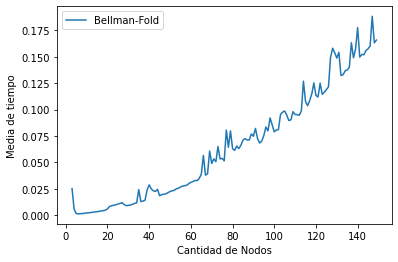

In [59]:
from matplotlib import cm
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import numpy as np

x=[]; y=[]
for n in range(3,150):
  z = repeat(setup="from __main__ import funcionEspecial", stmt=f"funcionEspecial({n})", repeat=25, number=10)
  sum = 0
  for i in range(len(z)):
    sum += z[i]
  prom = sum/25
  x.append(n)
  y.append(prom)

plt.plot(x,y)
plt.legend(["Bellman-Fold"])

plt.xlabel('Cantidad de Nodos')
plt.ylabel('Media de tiempo')
plt.show()

##Análisis de experimento

Para este caso se puede ver como el algoritmo para nodos de tamaño n mayores crece aproximadamente de manera exponencial, debido a la cantidad de arcos y nodos que hay, puesto que al menos hay una conexión por nodo en el grafo, eso significa que pueden haber más arcos a análizar.